	 	 	 	Welcome to InvenTrack:
	 	 	 Manage your Inventory with Ease

What do you want to do?
1. Add stock
2. Update stock
3. Remove stock
4. Check expiry
5. Summary for manufacutre
6. Record sale
7. Show Sales Report 
8. Sales Analysis
9. Check and Restock Inventory
10.Show Inventory
11.Exit



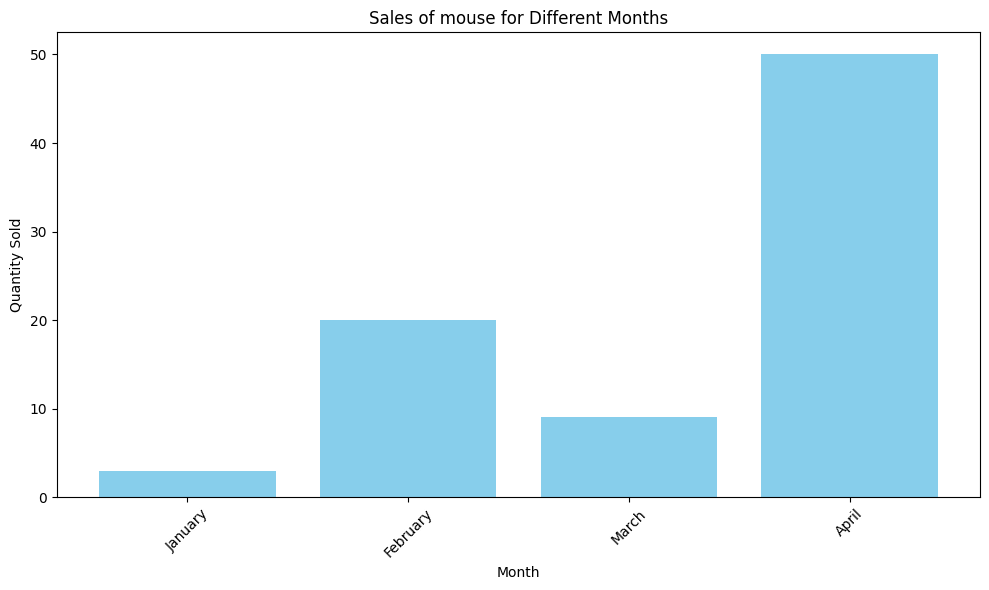


What do you want to do?
1. Add stock
2. Update stock
3. Remove stock
4. Check expiry
5. Summary for manufacutre
6. Record sale
7. Show Sales Report 
8. Sales Analysis
9. Check and Restock Inventory
10.Show Inventory
11.Exit

No items need restocking.

What do you want to do?
1. Add stock
2. Update stock
3. Remove stock
4. Check expiry
5. Summary for manufacutre
6. Record sale
7. Show Sales Report 
8. Sales Analysis
9. Check and Restock Inventory
10.Show Inventory
11.Exit

No items need restocking.

What do you want to do?
1. Add stock
2. Update stock
3. Remove stock
4. Check expiry
5. Summary for manufacutre
6. Record sale
7. Show Sales Report 
8. Sales Analysis
9. Check and Restock Inventory
10.Show Inventory
11.Exit

Exiting program.


In [2]:
import datetime
from datetime import  timedelta
import smtplib #lib used for email 
from email.message import EmailMessage
import matplotlib.pyplot as plt


class InventoryError(Exception):
    """Base class for inventory related exceptions."""
    pass


class QuantityError(InventoryError):
    """Exception raised for errors in quantity."""
    pass


class PriceError(InventoryError):
    """Exception raised for errors in price."""
    pass


class DateError(InventoryError):
    """Exception raised for errors in dates."""
    pass
class  Expire_daysError(InventoryError):
      """Exception raised for errors in dates."""
      pass
    


sales_file = f"sales_transactions_{datetime.date.today()}.txt"

inventory_file = "inventory.txt"

def read_inventory_from_file():
    try:
        with open(inventory_file, "r") as file:
            return eval(file.read())
    except FileNotFoundError:
        return []

def write_inventory_to_file(inventory):
    with open(inventory_file, "w") as file:
        file.write(str(inventory))

inventory = read_inventory_from_file()

class InventoryError(Exception):
    """Base class for inventory related exceptions."""
    pass


class QuantityError(InventoryError):
    """Exception raised for errors in quantity."""
    pass


class PriceError(InventoryError):
    """Exception raised for errors in price."""
    pass


class DateError(InventoryError):
    """Exception raised for errors in dates."""
    pass

# add items
def add_item():
    name = input("Enter item name: ")
    
    while True:
        try:
            quantity = int(input("Enter quantity: "))
            if quantity <= 0:
                raise QuantityError("Error: Quantity must be a positive number.")
            break
        except ValueError:
            print("Error: Quantity must be a  number.")
        except QuantityError as e:
            print(e)

    while True:
        try:
            price = float(input("Enter price per item: "))
            if price <= 0:
                raise PriceError("Error: Price must be a positive number.")
            break
        except ValueError:
            print("Error: Price must be a number.")
        except PriceError as e:
            print(e)

    while True:
        manufacturing_date_str = input("Enter manufacturing date (YYYY-MM-DD): ")
        try:
            manufacturing_date = datetime.datetime.strptime(manufacturing_date_str, "%Y-%m-%d").date()
            if manufacturing_date > datetime.date.today():
                raise DateError("Error: Manufacturing date cannot be in the future.")
            break
        except ValueError:
            print("Error: Please enter a valid date in the format YYYY-MM-DD.")
        except DateError as e:
            print(e)

    while True:
        try:
            expire_days = int(input("Enter days until expiration: "))
            if expire_days <= 0:
                raise Expire_daysError("Error: Expire days must be a positive integer.")
            break
        except ValueError:
            print("Error: Expire days must be a  number.")
        except Expire_daysError as e:
            print(e)

    inventory.append({
        'name': name,
        'quantity': quantity,
        'price': price,
        'manufacturing_date': manufacturing_date.strftime("%Y-%m-%d"),
        'expire_days': expire_days
    })
    write_inventory_to_file(inventory)
    print("Item added successfully!")



# update items
def update_item():
    name = input("Enter item name to update: ")
    print("1. Update quantity")
    print("2. Update price")
    print("3. Update manufacturing date")
    print("4. Update Expire days")
    found = False
    while not found:
        for item in inventory:
            if item['name'] == name:
                found = True
                
                choice = input("Enter your choice (1-4): ")
                if choice == '1':
                    while True:
                        try:
                            quantity = int(input("Enter new quantity: "))
                            item['quantity'] = quantity
                            break
                        except ValueError:
                            print("Error: Quantity must be a whole number.")
                elif choice == '2':
                    while True:
                        try:
                            price = float(input("Enter new price: "))
                            item['price'] = price
                            break
                        except ValueError:
                            print("Error: Price must be a number.")
                elif choice == '3':
                    while True:
                        try:
                            manufacturing_date = input("Enter manufacturing date (YYYY-MM-DD): ")
                            manufacturing_date = datetime.datetime.strptime(manufacturing_date, "%Y-%m-%d").date()
                            if manufacturing_date > datetime.date.today():
                                print("Error: Manufacturing date cannot be in the future.")
                            else:
                                item['manufacturing_date'] = manufacturing_date.strftime("%Y-%m-%d")
                                break
                        except ValueError:
                            print("Error: Please enter a valid date in the format YYYY-MM-DD.")
                elif choice=='4':
                     while True:
                        try:
                            Expire_days = int(input("Enter new days: "))
                            item['expire_days'] = Expire_days
                            break
                        except ValueError:
                            print("Error: days must be a whole number.")            
                else:
                    print("Invalid choice.")
                write_inventory_to_file(inventory)
                print("Item updated successfully!")
                return
        else:
            print("Item not found in inventory.")
            name = input("Enter item name to update: ")

# delete stock
def delete_item(name):
    inventory_copy = inventory[:]  
    for item in inventory_copy:
        if item['name'] == name:
            inventory.remove(item)  
            write_inventory_to_file(inventory)  
            print(f"{name} deleted successfully!")
            return
    print("Item not found in inventory.")

# show inventory
def display_inventory():
    print("Current Inventory:")
    print("{:<15} {:<10} {:<10} {:<20}  {:<20}" .format('Item Name', 'Quantity', 'Price', 'Manufacturing Date','Expire days'))
    for item in inventory:
        name = item.get('name', 'N/A')
        quantity = item.get('quantity', 'N/A')
        price = item.get('price', 'N/A')
        manufacturing_date = item.get('manufacturing_date', 'N/A')
        expire_days = item.get('expire_days', 'N/A')
        print("{:<15} {:<10} {:<10} {:<20}  {:<20}".format(name, quantity, price, manufacturing_date, expire_days))

# for email
def content():
    f=open("email_content.txt","w+")
    for item in inventory:
        name = item.get('name', 'N/A')
        quantity = item.get('quantity', 'N/A')
        quantity=str(quantity)
        price = item.get('price', 'N/A')
        price=str(price)
        manufacturing_date = item.get('manufacturing_date', 'N/A')
        expire_days = item.get('expire_days', 'N/A')
        manufacturing_date = datetime.datetime.strptime(item['manufacturing_date'], "%Y-%m-%d")
        expiration_date = manufacturing_date + timedelta(days=float(item['expire_days']))
        manufacturing_date=str(manufacturing_date)
        if datetime.datetime.now() > expiration_date:
            f.write(name +" " +quantity +" " +price +" " +manufacturing_date + " Expired  " +"\n")    
        else:
            time_left = expiration_date.date() - datetime.date.today()
            time_left=str(time_left)
            f.write(name +" " +quantity +" " +price +" " +manufacturing_date +" " +time_left +" \n ")
           

# for email
def summary():
    f=open("email_content.txt")
    lines=f.readlines()
    content=""
    for words in lines:
        content+=words
    server=smtplib.SMTP('smtp.gmail.com',587)
    server.starttls()
    body=content
    em=EmailMessage()
    em['From']="inventoryshah@gmail.com"
    em['To']="ajshah191@gmail.com"
    em['Subject']="SUMMARY!"
    em.set_content(body)
    server.login("inventoryshah@gmail.com","fwdq qgws fhza shia")
    server.sendmail("inventoryshah@gmail.com","ajshah191@gmail.com",em.as_string())
    print("E-Mail Sent Successfullyy!")

# sell items
def record_sale():
    name = input("Enter item name sold: ")
    quantity_sold = int(input("Enter quantity sold: "))

    for item in inventory:
        if item['name'] == name:
            if item['quantity'] >= quantity_sold:
                item['quantity'] -= quantity_sold
                print("Sale recorded successfully!")
                with open(sales_file, "a+") as sf:
                    sf.write(f"{name},{quantity_sold}\n")
                with open(inventory_file, "w") as inv_file:
                    inv_file.write(str(inventory))
                return
            else:
                print("Error: Insufficient quantity available for sale.")
                return
    print("Item not found in inventory.")


def read_sales_transactions():

    try:
        with open(sales_file, "r") as file:
            sales_transactions = [line.strip().split(",") for line in file]
        return sales_transactions
    except FileNotFoundError:
        return []

# generate bill
def generate_sales_report():
    sales_transactions = read_sales_transactions()
    total_sales = {}

    for transaction in sales_transactions:
        name, quantity_sold = transaction
        quantity_sold = int(quantity_sold)
        if name in total_sales:
            total_sales[name] += quantity_sold
        else:
            total_sales[name] = quantity_sold

    total_sales_amount = 0  
    print("Sales Report:")
    print("{:<15} {:<10} {:<10}".format('Item Name', 'Quantity Sold', 'Total Sales'))
    for name, quantity_sold in total_sales.items():
        for item in inventory:
            if item['name'] == name:
                total_sales_amount += quantity_sold * item['price']
                print("{:<15} {:<10} {:<10}".format(name, quantity_sold, quantity_sold * item['price']))
                break  
    print("Total Sales: $", total_sales_amount)



# genrate graph and do analysis
def generate_sales_graph(sales_file, item_choice):
    sales_data = {}
    with open(sales_file, 'r') as file:
        for line in file:
            line = line.strip().split(',')
            item_name = line[0]
            date = line[2]  
            quantity = int(line[1])
            if item_name not in sales_data:
                sales_data[item_name] = []
            sales_data[item_name].append((date, quantity))

    if item_choice in sales_data:
        selected_sales = sales_data[item_choice]
        dates, quantities = zip(*selected_sales)
        
        dates = [datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%B') for date in dates]

        plt.figure(figsize=(10, 6))
        plt.bar(dates, quantities, color='skyblue')
        plt.title(f'Sales of {item_choice} for Different Months')
        plt.xlabel('Month')
        plt.ylabel('Quantity Sold')
        plt.xticks(rotation=45)
        plt.tight_layout()

        # with open('output_graph_info.txt', 'w') as output_file:
        #     output_file.write(f'Graph Info:\nSales of {item_choice} for Different Months\n')
        #     output_file.write('Month, Quantity\n')
        #     for date, quantity in selected_sales:
        #         output_file.write(f'{date}, {quantity}\n')

            # output_file.write(f'\nGraph Saved as output_graph_{item_choice}.png\n')
        plt.savefig(f'output_graph_{item_choice}.png')

        plt.show()
    else:
        print(f"No data found for '{item_choice}'. Please choose a valid item.")

# restock inventory
def check_and_restock_inventory():
    global inventory  

    inventory = read_inventory_from_file()

    items_to_restock = []
    for item in inventory:
        if item['quantity'] == 0:
            items_to_restock.append(item)

    if items_to_restock:
        print("Restocking the following items:")
        for item in items_to_restock:
            restock_quantity = int(input(f"Enter quantity to restock for '{item['name']}': "))
            if restock_quantity > 0:
                item['quantity'] += restock_quantity
                print(f"{restock_quantity} units of '{item['name']}' restocked successfully.")
            else:
                print("Error: Restock quantity must be greater than 0.")

        write_inventory_to_file(inventory)
    else:
        print("No items need restocking.")


# check expiry date
def check_expiry():
    print("{:<15} {:<10} {:<10} {:<10}".format('Item Name', 'Quantity', 'Price', 'EXPIRY UPDATE'))
    for item in inventory:
        try:
            manufacturing_date = datetime.datetime.strptime(item['manufacturing_date'], "%Y-%m-%d")
            expire_days = int(item['expire_days'])
            expiration_date = manufacturing_date + timedelta(days=float(item['expire_days']))
            if datetime.datetime.now() > expiration_date:
                print("{:<15} {:<10} {:<10} {:<10}".format(item['name'], item['quantity'], item['price'],'expired'))
                print(f"WANT TO DELETE EXPIRED {item['name']}?")
                que=input(f"do you want to delete {item['name']}(yes/no):")
                if que.lower() == 'yes':
                    delete_item(item['name'])
                    break  
                

            else:
                time_left = expiration_date.date() - datetime.date.today()
                time_left = str(time_left)
                print("{:<15} {:<10} {:<10} {:<10}".format(item['name'], item['quantity'], item['price'], str(time_left)))
        except KeyError:
            print("Error: Missing 'Expire_days' for item:", item.get('name'))

print("\t \t \t \tWelcome to InvenTrack:")
print("\t \t \t Manage your Inventory with Ease")
while True:
    print("\nWhat do you want to do?")
    print("1. Add stock")
    print("2. Update stock")
    print("3. Remove stock")
    print("4. Check expiry")
    print("5. Summary for manufacutre")
    print("6. Record sale")
    print("7. Show Sales Report ")
    print("8. Sales Analysis")
    print("9. Check and Restock Inventory")
    print("10.Show Inventory")
    print("11.Exit\n")
    
    
    choice = input("Enter your choice (1-11): ")
    if choice == '1':
        add_item()
    elif choice == '2':
        update_item()
    elif choice == '3':
        name = input("Enter item name to delete: ")
        delete_item(name)
    elif choice == '4':
        check_expiry()
    elif choice == '5':
        content()
        summary()
    elif choice == '6':
        record_sale()
    elif choice == '7':
        generate_sales_report()
    elif choice == '8':
        sales_file = input("Enter the sales file name: ")
        item_choice = input("Enter the name of the item you want to see the sales data for: ")
        generate_sales_graph(sales_file, item_choice)
    elif choice == '9':
        check_and_restock_inventory()
    elif choice == '10':
        display_inventory()
    elif choice == '11':
        print("Exiting program.")
        break
    else:
        print("Invalid choice. Please enter a number from 1 to 11.")
